## An Investigation of Particulate Matter 2.5 and its impact in DMV During the COVID-19 Pandemic 



## Data Sciecne Workflow 

### Part I 

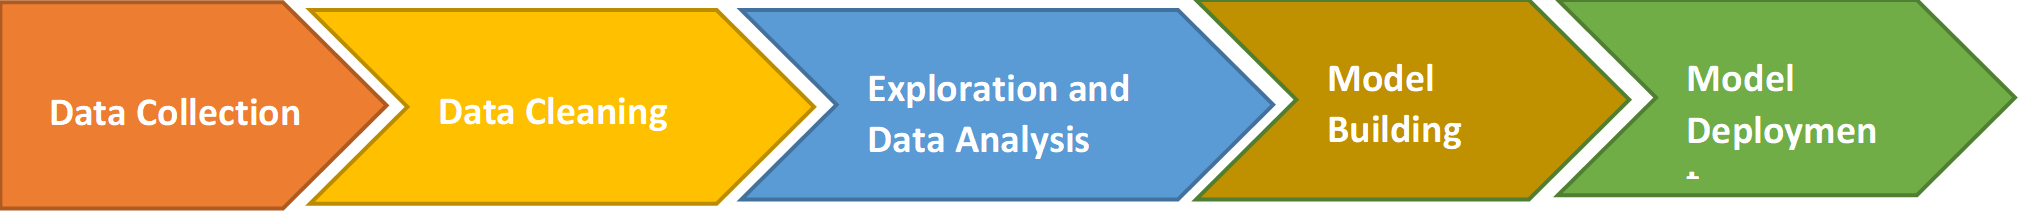

### Part II 


####  Dimention Reduction :

 Data Reduction improves the interpretation of the parameters of the machine learning model by removing irrelevant data 
              
##### Attribute Subset Selection Method

  As mentioned in part I , Initially the dataset containing 879531 Columns and 29 Rows were Collected from Environmental  
  Protection Agency (EPA) was collected. Based on the data science process , stage 3, The large data set has many attributes 
  some of which are irrelevant to data mining or some are redundant. The attribute subset selection reduces the volume of data 
  by eliminating the redundant and irrelevant attribute.  
 
       

data = pd.read_csv('DMV1004.csv',header= 0)

In [208]:
data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,SO2_Contn,SO2 _Contn,PM2.5_Contn,deathIncrease,deathIncrease.1
0,0.019,21.7,0.3,1.4,11.2,11,0,14
1,0.020,19.0,0.3,1.0,8.0,4,3,11
2,0.016,24.9,0.3,0.8,6.4,6,3,8
3,0.014,22.1,0.3,1.8,14.4,7,1,3
4,0.013,28.6,0.3,1.3,10.4,8,4,14


In [209]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import hvplot.pandas
import bokeh 
import altair as alt 
plt.rcParams['figure.figsize']=(10,8)

In [210]:
 data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,SO2_Contn,SO2 _Contn,PM2.5_Contn,deathIncrease,deathIncrease.1
0,0.019,21.7,0.3,1.4,11.2,11,0,14
1,0.020,19.0,0.3,1.0,8.0,4,3,11
2,0.016,24.9,0.3,0.8,6.4,6,3,8
3,0.014,22.1,0.3,1.8,14.4,7,1,3
4,0.013,28.6,0.3,1.3,10.4,8,4,14


In [211]:
data.columns

Index([' Ozone_ Contn', ' NO2_Contn', ' CO_ Concn', 'SO2_Contn', 'SO2 _Contn',
       ' PM2.5_Contn', 'deathIncrease', 'deathIncrease.1'],
      dtype='object')

In [212]:
x_data = data[[' Ozone_ Contn', ' NO2_Contn', ' CO_ Concn','SO2 _Contn',
       ' PM2.5_Contn','deathIncrease.1']].astype(int)

In [213]:
x_data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,SO2 _Contn,PM2.5_Contn,deathIncrease.1
0,0,21,0,11,11,14
1,0,19,0,8,4,11
2,0,24,0,6,6,8
3,0,22,0,14,7,3
4,0,28,0,10,8,14


<AxesSubplot:>

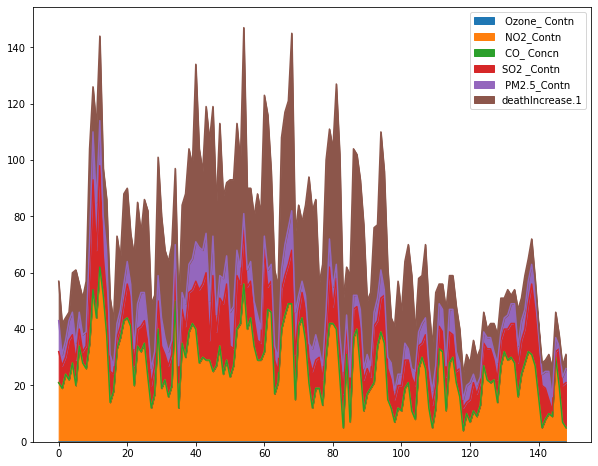

In [214]:
x_data.plot.area()

In [215]:
data[' PM2.5_Contn']=data[' PM2.5_Contn'].astype(int)


In [216]:
x_data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,SO2 _Contn,PM2.5_Contn,deathIncrease.1
0,0,21,0,11,11,14
1,0,19,0,8,4,11
2,0,24,0,6,6,8
3,0,22,0,14,7,3
4,0,28,0,10,8,14


In [217]:
alldata = x_data.describe()
alldata

,Ozone_ Contn,NO2_Contn,CO_ Concn,SO2 _Contn,PM2.5_Contn,deathIncrease.1
count,149.0,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.0,26.369128,0.013423,11.959732,6.979866,26.610738
std,0.0,12.462565,0.115465,6.535640,3.394092,16.167080
min,0.0,4.000000,0.000000,2.000000,1.000000,1.000000
25%,0.0,17.000000,0.000000,8.000000,5.000000,12.000000
50%,0.0,27.000000,0.000000,11.000000,6.000000,26.000000
75%,0.0,35.000000,0.000000,14.000000,8.000000,37.000000
max,0.0,61.000000,1.000000,39.000000,17.000000,66.000000


In [218]:
corr=alldata.corr()
corr

,Ozone_ Contn,NO2_Contn,CO_ Concn,SO2 _Contn,PM2.5_Contn,deathIncrease.1
Ozone_ Contn,1.000000,0.930259,0.999979,0.974094,0.995661,0.912656
NO2_Contn,0.930259,1.000000,0.932175,0.986284,0.959957,0.997652
CO_ Concn,0.999979,0.932175,1.000000,0.975450,0.996169,0.914833
SO2 _Contn,0.974094,0.986284,0.975450,1.000000,0.990681,0.978014
PM2.5_Contn,0.995661,0.959957,0.996169,0.990681,1.000000,0.945922
deathIncrease.1,0.912656,0.997652,0.914833,0.978014,0.945922,1.000000


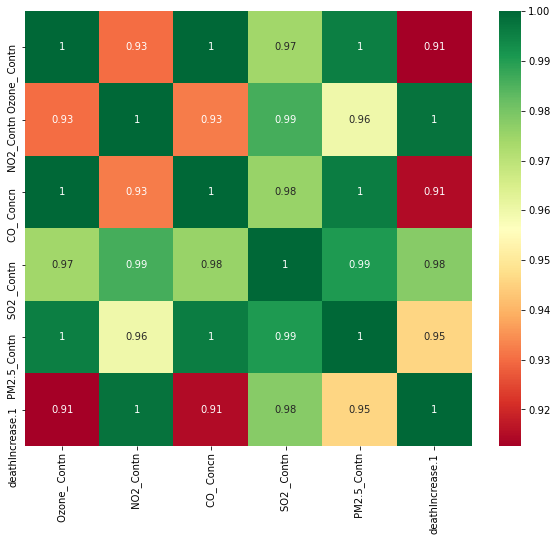

In [219]:
alldata =sns.heatmap(corr,annot=True,cmap="RdYlGn")

In [220]:
y_data = data[[' PM2.5_Contn','deathIncrease.1']]

<AxesSubplot:>

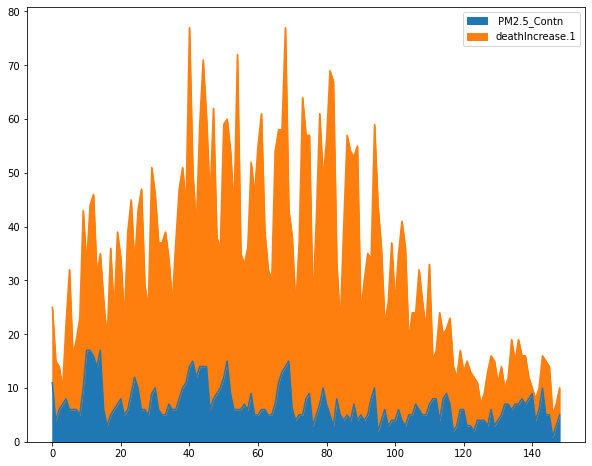

In [221]:
y_data.plot.area()

In [222]:
plt1= data[['deathIncrease.1']]

In [223]:
plt1.head(3)

,deathIncrease.1
0,14
1,11
2,8


In [224]:
x_data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,SO2 _Contn,PM2.5_Contn,deathIncrease.1
0,0,21,0,11,11,14
1,0,19,0,8,4,11
2,0,24,0,6,6,8
3,0,22,0,14,7,3
4,0,28,0,10,8,14


In [225]:
plt2 =x_data[[' PM2.5_Contn']]

<AxesSubplot:>

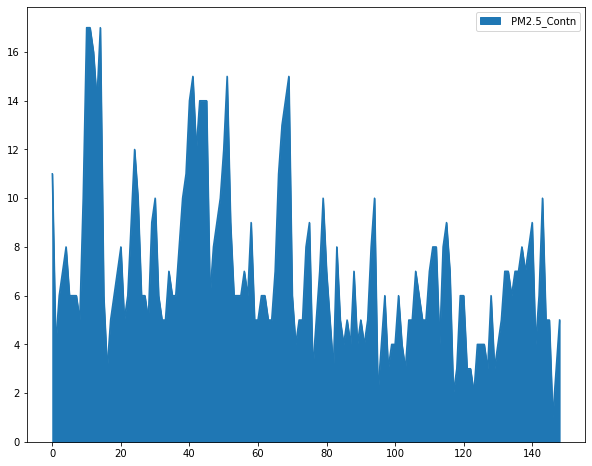

In [243]:
plt2.plot.area()

In [227]:
x=plt1
y=plt2

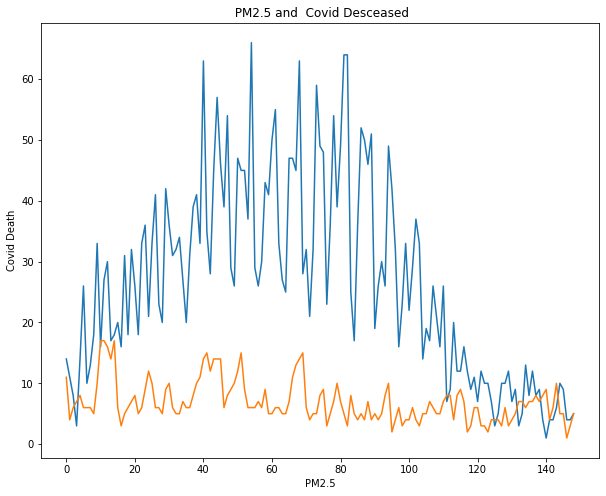

In [246]:
plt.xlabel("PM2.5")
plt.ylabel("Covid Death")
plt.title(" PM2.5 and  Covid Desceased")
plt.plot(x)
plt.plot(y)

In [245]:
x_data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,SO2 _Contn,PM2.5_Contn,deathIncrease.1
0,0,21,0,11,11,14
1,0,19,0,8,4,11
2,0,24,0,6,6,8
3,0,22,0,14,7,3
4,0,28,0,10,8,14


In [230]:
from bokeh.models import HoverTool

In [231]:
x_data.columns

Index([' Ozone_ Contn', ' NO2_Contn', ' CO_ Concn', 'SO2 _Contn',
       ' PM2.5_Contn', 'deathIncrease.1'],
      dtype='object')

In [232]:
N2S2 = x_data[[' NO2_Contn', 'SO2 _Contn']]
N2S2

,NO2_Contn,SO2 _Contn
0,21,11
1,19,8
2,24,6
3,22,14
4,28,10
...,...,...
144,9,2
145,30,2
146,20,13
147,7,13


<AxesSubplot:>

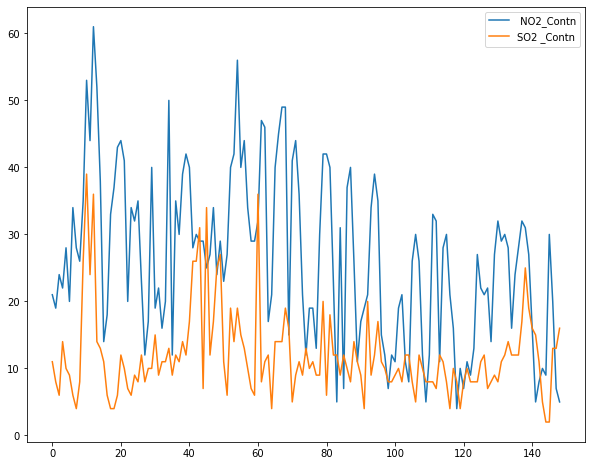

In [233]:
N2S2.plot.line()

In [234]:
z=N2S2
z

,NO2_Contn,SO2 _Contn
0,21,11
1,19,8
2,24,6
3,22,14
4,28,10
...,...,...
144,9,2
145,30,2
146,20,13
147,7,13


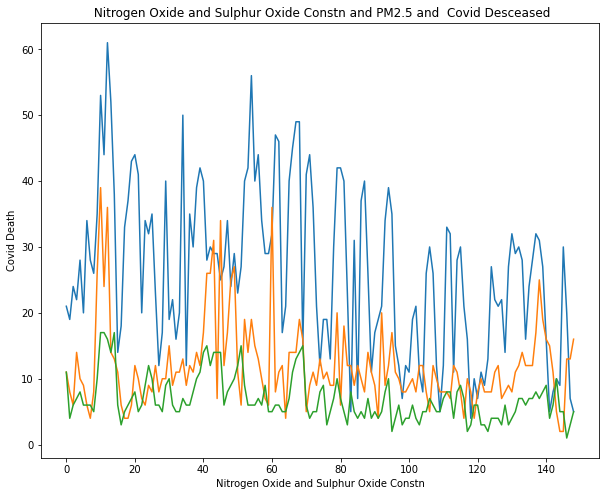

In [235]:
z=N2S2
plt.xlabel("Nitrogen Oxide and Sulphur Oxide Constn")
plt.ylabel("Covid Death")
plt.title(" Nitrogen Oxide and Sulphur Oxide Constn and PM2.5 and  Covid Desceased")
plt.plot(z)
plt.plot(y)

In [236]:
OZCO=x_data[[' Ozone_ Contn',' CO_ Concn']]
OZCO

,Ozone_ Contn,CO_ Concn
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
144,0,0
145,0,0
146,0,0
147,0,0


In [237]:
w=OZCO
w

,Ozone_ Contn,CO_ Concn
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
144,0,0
145,0,0
146,0,0
147,0,0


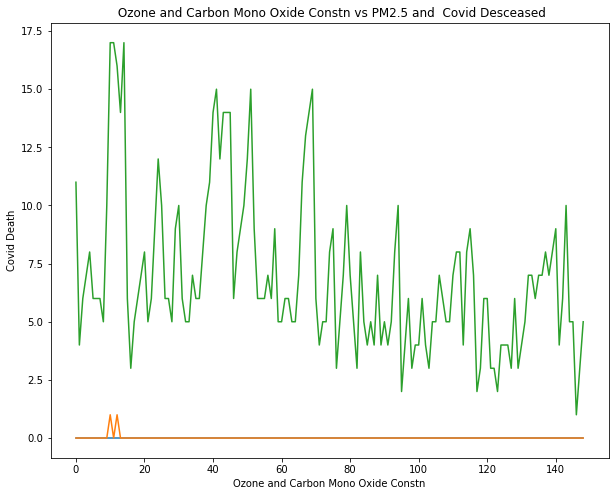

In [238]:
w=OZCO
plt.xlabel("Ozone and Carbon Mono Oxide Constn")
plt.ylabel("Covid Death")
plt.title(" Ozone and Carbon Mono Oxide Constn vs PM2.5 and  Covid Desceased")
plt.plot(w)
plt.plot(y)

In [239]:
x_data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,SO2 _Contn,PM2.5_Contn,deathIncrease.1
0,0,21,0,11,11,14
1,0,19,0,8,4,11
2,0,24,0,6,6,8
3,0,22,0,14,7,3
4,0,28,0,10,8,14


In [240]:
 x_data.columns

Index([' Ozone_ Contn', ' NO2_Contn', ' CO_ Concn', 'SO2 _Contn',
       ' PM2.5_Contn', 'deathIncrease.1'],
      dtype='object')

In [241]:
m = x_data[[' NO2_Contn']]


In [242]:
n= x_data[[ ' PM2.5_Contn']]

   ## Next Step 
   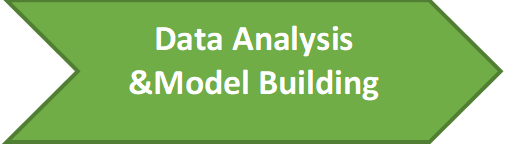
